# Building and implementing a neural network from scratch in Python
By [Zahra Taheri](https://github.com/zahta), October 19, 2020

### Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## A Feedforward neural network with 3 layers
- ReLU activation functions
- MSE Loss

In [33]:
class ThreeLayersFNN():

    def __init__(self, layers=[4,4,2,1], lr=0.1): 
        self.parameters = {}
        self.loss = []
        self.layers = layers
        self.lr = lr
        self.sample_size = None
        self.X = None
        self.y = None   
        
 

    def initialize_weights(self):       
        ''' 
        Random weights and biases for different layers
        '''
        # seed for random number generation
        np.random.seed(42)      
        '''
        Hidden Layer 1
        '''
        self.parameters['W1_1'] = 0.10 * np.random.random((self.layers[0], self.layers[1]))
        self.parameters['b1_1'] = 0.010 * np.ones((self.layers[1],))
        self.parameters['W2_1'] = 0.10 * np.random.random((self.layers[1],self.layers[2]))
        self.parameters['b2_1'] = 0.010 * np.ones((self.layers[2],))
        '''
        Hidden Layer 2
        ''' 
        self.parameters['W1_2'] = 0.10 * np.random.random((self.layers[2], self.layers[3]))
        self.parameters['b1_2'] = 0.010 * np.ones((self.layers[3],))

        
        
    def relu(self, z):
        '''
        ReLU activation function
        '''
        return np.maximum(0, z)
   

        
    def sigmoid(self, z):
        '''
        Sigmoid activation function
        '''
        return 1.0/(1.0 + np.exp(-z))
    
    
    
    def sigmoid_der(self, z):
        '''
        Derivative of Sigmoid activation function
        '''
        return self.sigmoid(z) *(1.0 - self.sigmoid (z))
    
    
    
    def relu_der(self, z):
        '''
        Derivative of ReLU activation function
        '''
        z[z<=0] = 0
        z[z>0] = 1
        return z
    
    
    
    def mse_loss(self, y, yhat):
        '''
        Mean square error loss
        '''
        error = ((1/2) * (np.power((y - yhat), 2)))
        loss = error.sum()
        return loss
    
    
    
    #def crossentropy_loss(self, y, yhat):
    #    '''
    #    Cross entropy loss
    #    '''
    #    nsample = len(y)
    #    loss = -(1 / nsample) * (np.sum(np.multiply(np.log(yhat), y) + np.multiply((1 - y), np.log(1 - yhat))))
    #    return loss
    
    
    
    def feedforward(self):
        '''
        Forward propagation
        '''
        Z1 = np.dot(self.X, self.parameters['W1_1']) + self.parameters['b1_1']
        A1 = self.relu(Z1)
        Z2 = np.dot(A1, self.parameters['W2_1']) + self.parameters['b2_1']
        A2 = self.relu(Z2)
        Z3 = np.dot(A2, self.parameters['W1_2']) + self.parameters['b1_2']
        yhat = self.relu(Z3)
        loss = self.mse_loss(self.y, yhat)
        
        # save new parameters     
        self.parameters['Z1'] = Z1
        self.parameters['Z2'] = Z2
        self.parameters['Z3'] = Z3
        self.parameters['A1'] = A1
        self.parameters['A2'] = A2
        
        return yhat,loss
        
        
        
    def backpropagation(self, yhat):  
        '''
        Back propagation
        '''
        # application of the chain rule to find derivative of the loss function with respect to the parameters    
        
        dloss_dyhat = self.y - yhat
        dloss_dZ3 = dloss_dyhat * self.relu_der(self.parameters['Z3'])
        dloss_dW1_2 = np.dot(self.parameters['A2'].T, dloss_dZ3)
        dloss_db1_2 = np.sum(dloss_dZ3, axis=0)
        
        dloss_dA2 = np.dot(dloss_dyhat, self.parameters['W1_2'].T)
        dloss_dZ2 = dloss_dA2 * self.relu_der(self.parameters['Z2'])
        dloss_dW2_1 = np.dot(self.parameters['A1'].T, dloss_dZ2)
        dloss_db2_1 = np.sum(dloss_dZ2, axis=0)
        
        dloss_dA1 = np.dot(dloss_dZ2, self.parameters['W2_1'].T)
        dloss_dZ1 = dloss_dA1 * self.relu_der(self.parameters['Z1'])
        dloss_dW1_1 = np.dot(self.X.T, dloss_dZ1)
        dloss_db1_1 = np.sum(dloss_dZ1, axis=0)
        
        # update weights and biases with the derivatives of loss function
        self.parameters['W1_1'] += self.lr * dloss_dW1_1
        self.parameters['b1_1'] += self.lr * dloss_db1_1
        self.parameters['W2_1'] += self.lr * dloss_dW2_1
        self.parameters['b2_1'] += self.lr * dloss_db2_1
        self.parameters['W1_2'] += self.lr * dloss_dW1_2
        self.parameters['b1_2'] += self.lr * dloss_db1_2

   

    def fit(self, X, y, epochs):
        '''
        Train the neural network (using training set and labels)
        '''
        self.X = X
        self.y = y
        self.initialize_weights() 

        for i in range(epochs):
            yhat, loss = self.feedforward()
            self.backpropagation(yhat)
            self.loss.append(loss)
            if i % 500 == 0:
                print("Epoch:  {} Loss: {}".format(i, loss))
            
        print("yhat: ", yhat)
        print("y: ", y)
            
            
    
    def predict(self, X_test):
        '''
        Test the neural network (using test set and labels)
        '''
        Z1 = np.dot(X_test, self.parameters['W1_1']) + self.parameters['b1_1']
        A1 = self.relu(Z1)
        Z2 = np.dot(A1, self.parameters['W2_1']) + self.parameters['b2_1']
        A2 = self.relu(Z2)
        Z3 = np.dot(A2, self.parameters['W1_2']) + self.parameters['b1_2']
        y_pred = self.relu(Z3)
        return y_pred

    
                                
    def test_loss(self, y_test, yhat_test):
        '''
        Loss of the test set
        '''
        loss_t = self.mse_loss(y_test, yhat_test)
        return loss_t

    

    def plot_loss(self):
        '''
        Plots the loss curve
        '''
        plt.plot(self.loss)
        plt.xlabel("Iteration")
        plt.ylabel("MSE")
        plt.title("Loss curve for training")
        plt.show()

## Dataset: A simple one

In [ ]:
X = np.array([[0, 0, 1,1],
              [0, 1, 1,1],
              [1, 0, 1,0],
              [1, 1, 1,0]])
y = np.array([[1],
              [0],
              [1],
              [0]])

In [ ]:
nn = ThreeLayersFNN()
nn.fit(X,y,1001)

Epoch:  0 Loss: 0.9735922444018876
Epoch:  500 Loss: 9.50616686707192e-31
Epoch:  1000 Loss: 1.232595164407831e-32
yhat:  [[1.]
 [0.]
 [1.]
 [0.]]
y:  [[1]
 [0]
 [1]
 [0]]


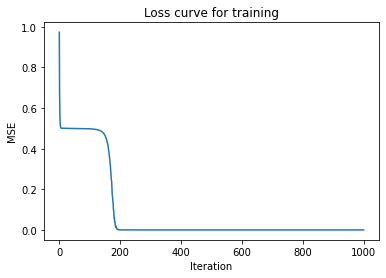

In [ ]:
nn.plot_loss()

## Dataset: California housing values

### Import libraries

In [1]:
#For some basic operations
import numpy as np
import pandas as pd

#For visualizations
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
mpl.rc('axes', labelsize=10)
mpl.rc('xtick', labelsize=10)
mpl.rc('ytick', labelsize=10)

# to make this notebook's output identical at every run
np.random.seed(42)

import warnings
warnings.filterwarnings('ignore')

## Reading the dataset

In [2]:
data=pd.read_csv('housing.csv')
data.shape

(20640, 10)

In [3]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


## Descriptive statistics and data visualizations

In [5]:
#Describe the dataset

data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
#Check the no. of unique items in each categorical column

data.select_dtypes('object').nunique()

ocean_proximity    5
dtype: int64

In [7]:
# Percentage of missing data in each column

number_of_columns = data.shape[0]
percentage_of_missing_data = data.isnull().sum()/number_of_columns
print(percentage_of_missing_data)

longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        0.010029
population            0.000000
households            0.000000
median_income         0.000000
median_house_value    0.000000
ocean_proximity       0.000000
dtype: float64


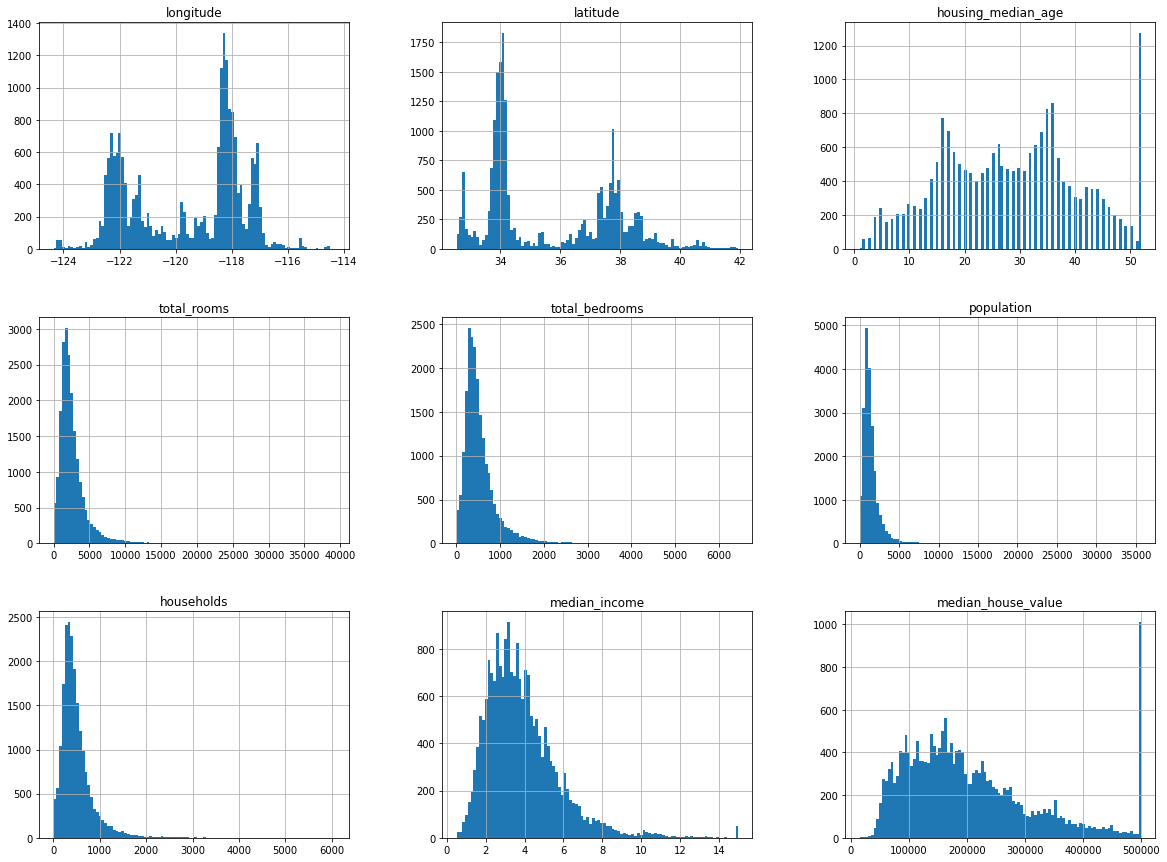

In [8]:
data.hist(bins=100, figsize=(20,15))

plt.show()

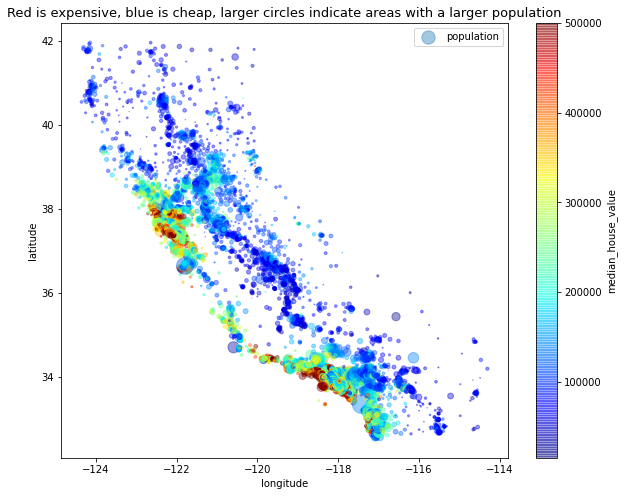

In [9]:
data.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=data["population"]/100, label="population", figsize=(10,8),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.title('Red is expensive, blue is cheap, larger circles indicate areas with a larger population',\
          fontweight = 20, fontsize = 13)
plt.legend()

In [10]:
corr_matrix = data.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

## Data Cleaning and Preparation

In [11]:
#Fill in missing values with median

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [12]:
#Remove the text attribute because median can only be calculated on numerical attributes:
data_num=data.drop("ocean_proximity", axis=1)

In [13]:
imputer.fit(data_num)
imputer.statistics_

array([-1.1849e+02,  3.4260e+01,  2.9000e+01,  2.1270e+03,  4.3500e+02,
        1.1660e+03,  4.0900e+02,  3.5348e+00,  1.7970e+05])

In [14]:
X = imputer.transform(data_num)
data_num_clean = pd.DataFrame(X, columns=data_num.columns,index=data_num.index)
data_num_clean.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [15]:
data_num_clean["rooms_per_household"] = data_num_clean["total_rooms"]/data_num_clean["households"]
data_num_clean["bedrooms_per_room"] = data_num_clean["total_bedrooms"]/data_num_clean["total_rooms"]
data_num_clean["population_per_household"]=data_num_clean["population"]/data_num_clean["households"]

In [16]:
#Preprocess the categorical input feature, `ocean_proximity`:
data_cat = data[["ocean_proximity"]]

In [17]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
data_cat_encoded = ordinal_encoder.fit_transform(data_cat)

In [18]:
#ordinal_encoder.categories_

In [19]:
data_num_clean["ocean_proximity"]=data_cat_encoded
data_clean=data_num_clean
data_clean.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,6.984127,0.146591,2.555556,3.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,6.238137,0.155797,2.109842,3.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,8.288136,0.129516,2.802260,3.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,5.817352,0.184458,2.547945,3.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,6.281853,0.172096,2.181467,3.0


In [20]:
housing_labels = data_clean["median_house_value"]
data_clean = data_clean.drop("median_house_value", axis=1)
data_clean["median_house_value"] = housing_labels
data_clean

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household,ocean_proximity,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,6.984127,0.146591,2.555556,3.0,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,6.238137,0.155797,2.109842,3.0,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,8.288136,0.129516,2.802260,3.0,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,5.817352,0.184458,2.547945,3.0,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,6.281853,0.172096,2.181467,3.0,342200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,5.045455,0.224625,2.560606,1.0,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,6.114035,0.215208,3.122807,1.0,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,5.205543,0.215173,2.325635,1.0,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,5.329513,0.219892,2.123209,1.0,84700.0


In [21]:
from sklearn import preprocessing

minmax_scale = preprocessing.MinMaxScaler()
X_scaled = minmax_scale.fit_transform(data_clean)
X_scaled.shape

(20640, 13)

In [22]:
#Splitting the dependent and independent variables

X = X_scaled[:,:-1]
y = X_scaled[:,-1]

print(X.shape)
print(y.shape)

(20640, 12)
(20640,)


In [23]:
#Splitting the dataset into training and test sets

from sklearn.model_selection import train_test_split

train_data, test_data, train_labels, test_labels = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(train_data.shape)
print(train_labels.shape)
print(test_data.shape)

(16512, 12)
(16512,)
(4128, 12)


In [24]:
# Without Normalization of the data

train_data = train_data
test_data = test_data
train_labels = train_labels.reshape(-1,1)
test_labels = test_labels.reshape(-1,1)

In [25]:
train_labels

array([[0.18144461],
       [0.75690616],
       [0.32494918],
       ...,
       [0.42701061],
       [0.55360803],
       [0.63917468]])

### Train the model

In [ ]:
nn = ThreeLayersFNN(layers=[12,32,100,1], lr=0.00001) # create the NN model

In [ ]:
nn.fit(train_data, train_labels, 5000)

Epoch:  0 Loss: 2595.2433880643216
Epoch:  500 Loss: 208.93486716691285
Epoch:  1000 Loss: 184.30386280454556
Epoch:  1500 Loss: 172.25450481816802
Epoch:  2000 Loss: 166.2769996181242
Epoch:  2500 Loss: 162.59107385352388
Epoch:  3000 Loss: 159.8957892365478
Epoch:  3500 Loss: 157.7172318052066
Epoch:  4000 Loss: 155.87521066392645
Epoch:  4500 Loss: 154.27724870209116
yhat:  [[0.34666826]
 [0.56636528]
 [0.51450829]
 ...
 [0.38340853]
 [0.52165392]
 [0.56346148]]
y:  [[0.18144461]
 [0.75690616]
 [0.32494918]
 ...
 [0.42701061]
 [0.55360803]
 [0.63917468]]


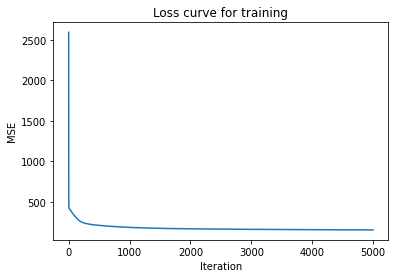

In [ ]:
nn.plot_loss()

In [ ]:
nn.test_loss(test_labels, nn.predict(test_data))

43.37992334729345

In [ ]:
print(test_labels, '\n \n', nn.predict(test_data))

[[0.06742446]
 [0.06350695]
 [1.        ]
 ...
 [1.        ]
 [0.1181459 ]
 [0.2814442 ]] 
 
 [[0.12693555]
 [0.19498128]
 [0.49029514]
 ...
 [0.88986224]
 [0.14969641]
 [0.36728938]]


### Feedforward Neural Network with PyTorch

In [ ]:
# import libraries

import torch
import torch.nn as nn
from torch.autograd import Variable
from torchsummary import summary

In [ ]:
from torch.utils.data import TensorDataset, DataLoader

tensor_x = torch.tensor(train_data, dtype=torch.float).cuda() # transform to torch tensor
tensor_x2 = torch.tensor(test_data, dtype=torch.float).cuda() 

tensor_y = torch.tensor(train_labels, dtype=torch.float).cuda()
tensor_y2 = torch.tensor(test_labels, dtype=torch.float).cuda()

train_dataset = TensorDataset(tensor_x, tensor_y) # create your dataset
test_dataset = TensorDataset(tensor_x2,tensor_y2)

In [ ]:
batch_size = train_data.shape[0]
num_epochs = 5000

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True) # create your dataloader
test_loader = DataLoader(test_dataset, batch_size=batch_size,  shuffle=False)

In [ ]:
class FNN(nn.Module):
    def __init__(self, input_dim, hidden_dim1, hidden_dim2, output_dim):
        super(FNN, self).__init__()
        
        self.linear1 = nn.Linear(input_dim, hidden_dim1)
        self.relu1 = nn.ReLU()
        self.linear2 = nn.Linear(hidden_dim1, hidden_dim2)
        self.relu2 = nn.ReLU()
        self.linear3 = nn.Linear(hidden_dim2, output_dim)
        self.relu3 = nn.ReLU()
        
    def forward(self, x):
        out = self.linear1(x)
        out = self.relu1(out)
        out = self.linear2(out)
        out = self.relu2(out)
        out = self.linear3(out)
        out = self.relu3(out)
        return out

In [ ]:
#(layers=[12,32,100,1], lr=0.00001)

input_dim = 12
output_dim = 1
hidden_dim1 = 32
hidden_dim2 = 100

model = FNN(input_dim, hidden_dim1, hidden_dim2, output_dim)

#######################
#  USE GPU FOR MODEL  #
#######################
if torch.cuda.is_available():
    model.cuda()

criterion = nn.MSELoss(reduction='sum')

learning_rate = 0.00001
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [ ]:
# Train the model

train_loss = []

for epoch in range(num_epochs):
    for i, (X, labels) in enumerate(train_loader):
        #######################
        #  USE GPU FOR MODEL  #
        #######################
        if torch.cuda.is_available():
            X = Variable(X.cuda())
            labels = Variable(labels.cuda())
        else:
            X = Variable(X)
            labels = Variable(labels)
        
        # Forward pass to get output/logits
        outputs = model(X)
        
        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()
        
        # Calculate Loss:
        loss = (1/2) * criterion(outputs, labels)
                
        '''
        Save loss to draw loss curve
        '''
        train_loss.append(loss)
        ''''''

        # Getting gradients w.r.t. parameters
        loss.backward()
        
        # Updating parameters
        optimizer.step()
        
    
        # Testing the model
        if epoch % 500 == 0:
            # Iterate through test dataset
            for X, labels in test_loader:
                #######################
                #  USE GPU FOR MODEL  #
                #######################
                if torch.cuda.is_available():
                    X = Variable(X.cuda())
                else:
                    X = Variable(X)    
                    
                # Forward pass only to get logits/output
                outputs = model(X)
                
                # Calculate Loss:
                loss_t = (1/2) * criterion(outputs, labels)
                
            # Print Loss
            print('Epoch: {}. Training Loss: {}. Test Loss: {}'.format(epoch, loss.data, loss_t.data))

Epoch: 0. Training Loss: 1523.8631591796875. Test Loss: 224.26168823242188
Epoch: 500. Training Loss: 199.60768127441406. Test Loss: 49.9838752746582
Epoch: 1000. Training Loss: 175.1207275390625. Test Loss: 44.47484588623047
Epoch: 1500. Training Loss: 167.76382446289062. Test Loss: 42.813926696777344
Epoch: 2000. Training Loss: 163.64727783203125. Test Loss: 41.91644287109375
Epoch: 2500. Training Loss: 160.29586791992188. Test Loss: 41.22687530517578
Epoch: 3000. Training Loss: 157.42233276367188. Test Loss: 40.668556213378906
Epoch: 3500. Training Loss: 154.98265075683594. Test Loss: 40.219390869140625
Epoch: 4000. Training Loss: 152.76026916503906. Test Loss: 39.813201904296875
Epoch: 4500. Training Loss: 150.5992431640625. Test Loss: 39.42655944824219


### Feedforward Neural Network with Tensorflow

In [ ]:
# Import libraries

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, ReLU
from tensorflow.keras import optimizers
from keras import backend

In [ ]:
#(layers=[12,32,100,1], lr=0.00001)

model = Sequential()
model.add(Dense(32, input_dim=12, activation="relu"))
model.add(Dense(100, activation="relu"))
model.add(Dense(1, activation="relu"))

def custom_loss(y, yhat):
        '''
        Square error loss
        '''
        error = ((1/2) * (y - yhat)**2)
        loss = backend.sum(error)
        return loss
    
model.compile(loss=custom_loss, optimizer='sgd')

backend.set_value(model.optimizer.learning_rate, 0.00001)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                416       
_________________________________________________________________
dense_1 (Dense)              (None, 100)               3300      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 3,817
Trainable params: 3,817
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(train_data, train_labels, batch_size = train_data.shape[0], epochs = 5000, verbose = 1)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 2ms/step - loss: 148.7543
Epoch 2502/5000
1/1 [==============================] - 0s 8ms/step - loss: 148.7493
Epoch 2503/5000
1/1 [==============================] - 0s 6ms/step - loss: 148.7443
Epoch 2504/5000
1/1 [==============================] - 0s 4ms/step - loss: 148.7393
Epoch 2505/5000
1/1 [==============================] - 0s 14ms/step - loss: 148.7343
Epoch 2506/5000
1/1 [==============================] - 0s 6ms/step - loss: 148.7292
Epoch 2507/5000
1/1 [==============================] - 0s 11ms/step - loss: 148.7242
Epoch 2508/5000
1/1 [==============================] - 0s 4ms/step - loss: 148.7192
Epoch 2509/5000
1/1 [==============================] - 0s 3ms/step - loss: 148.7142
Epoch 2510/5000
1/1 [==============================] - 0s 3ms/step - loss: 148.7092
Epoch 2511/5000
1/1 [==============================] - 0s 3ms/step - loss: 148.7042
Epoch 2512/5000
1/1 [==================

In [ ]:
model.evaluate(test_data, test_labels)

129/129 [==============================] - 0s 3ms/step - loss: 0.2935


0.29350829124450684

## Dataset: A high degree perturbed polynomial

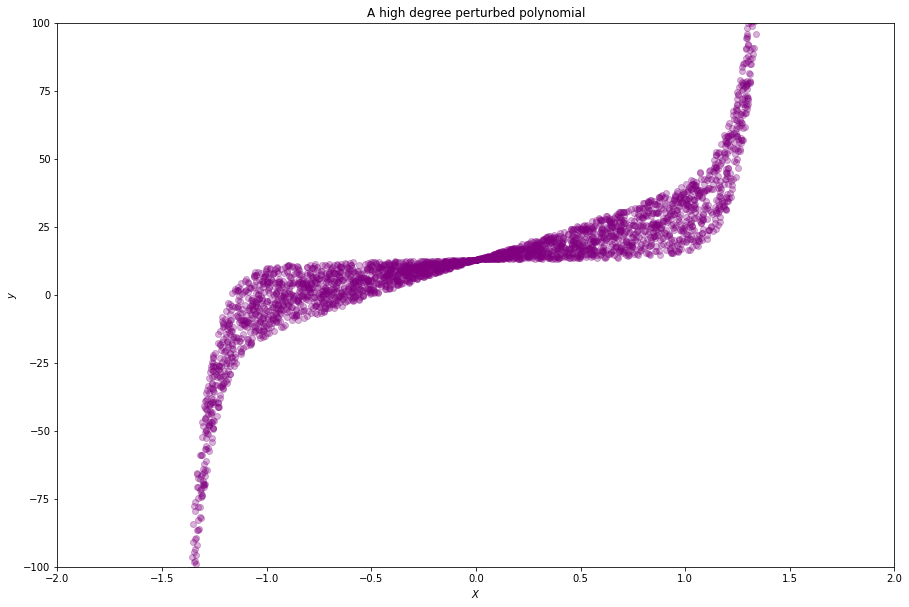

In [2]:
X = 9 * np.random.rand(10000,1) - 4
y = 13 + X- X**2 + X**3 + X**4 + X**15 + X*25*np.random.rand(10000,1)

#Plot the dataset
figure,axes=plt.subplots(figsize=(15,10))

axes.set_title('A high degree perturbed polynomial')
axes.set_xlabel('$X$')
axes.set_ylabel('$y$')
plt.axis([-2, 2, -100, 100])

axes.scatter(X,y,color="purple", alpha=0.3)

In [3]:
y.shape

(10000, 1)

In [4]:
from sklearn import preprocessing

minmax_scale = preprocessing.MinMaxScaler()
scaled = minmax_scale.fit_transform(np.concatenate((X,y), axis=1))
X = scaled[:,0].reshape(-1,1)
y = scaled[:,1].reshape(-1,1)
X

array([[0.97122082],
       [0.07107138],
       [0.6596083 ],
       ...,
       [0.48286301],
       [0.19369698],
       [0.75158212]])

In [5]:
#Splitting the dataset into training and test sets

from sklearn.model_selection import train_test_split

train_data, test_data, train_labels, test_labels = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(train_data.shape)
print(test_data.shape)

(8000, 1)
(2000, 1)


### Train the model

In [36]:
nn = ThreeLayersFNN(layers=[1,50,10,1], lr=0.00001) # create the NN model

In [37]:
nn.fit(train_data, train_labels, 5000)

Epoch:  0 Loss: 59.8562584182698
Epoch:  500 Loss: 54.34433473598911
Epoch:  1000 Loss: 51.96774488136297
Epoch:  1500 Loss: 50.23450800177048
Epoch:  2000 Loss: 49.157111533818224
Epoch:  2500 Loss: 48.492187449573606
Epoch:  3000 Loss: 47.981264719261546
Epoch:  3500 Loss: 47.50772912872372
Epoch:  4000 Loss: 47.03928146989883
Epoch:  4500 Loss: 46.58760921975988
yhat:  [[0.18573581]
 [0.        ]
 [0.00219727]
 ...
 [0.        ]
 [0.        ]
 [0.        ]]
y:  [[0.26454559]
 [0.03400447]
 [0.03402298]
 ...
 [0.03401729]
 [0.03402297]
 [0.03402123]]


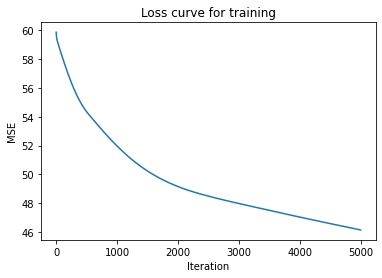

In [38]:
nn.plot_loss()

In [39]:
nn.test_loss(test_labels, nn.predict(test_data))

8.89336522205372

In [40]:
print(test_labels, '\n \n', nn.predict(test_data))

[[0.44276405]
 [0.03401713]
 [0.75861594]
 ...
 [0.03440336]
 [0.0097947 ]
 [0.03403524]] 
 
 [[0.19338246]
 [0.        ]
 [0.20131726]
 ...
 [0.11750201]
 [0.        ]
 [0.09128935]]


### Feedforward Neural Network with PyTorch

In [6]:
# import libraries

import torch
import torch.nn as nn
from torch.autograd import Variable
from torchsummary import summary

In [7]:
from torch.utils.data import TensorDataset, DataLoader

tensor_x = torch.tensor(train_data, dtype=torch.float).cuda() # transform to torch tensor
tensor_x2 = torch.tensor(test_data, dtype=torch.float).cuda() 

tensor_y = torch.tensor(train_labels, dtype=torch.float).cuda()
tensor_y2 = torch.tensor(test_labels, dtype=torch.float).cuda()

train_dataset = TensorDataset(tensor_x, tensor_y) # create your dataset
test_dataset = TensorDataset(tensor_x2,tensor_y2)

In [8]:
batch_size = train_data.shape[0]
num_epochs = 5000

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True) # create your dataloader
test_loader = DataLoader(test_dataset, batch_size=batch_size,  shuffle=False)

In [9]:
class FNN(nn.Module):
    def __init__(self, input_dim, hidden_dim1, hidden_dim2, output_dim):
        super(FNN, self).__init__()
        
        self.linear1 = nn.Linear(input_dim, hidden_dim1)
        self.relu1 = nn.ReLU()
        self.linear2 = nn.Linear(hidden_dim1, hidden_dim2)
        self.relu2 = nn.ReLU()
        self.linear3 = nn.Linear(hidden_dim2, output_dim)
        self.relu3 = nn.ReLU()
        
    def forward(self, x):
        out = self.linear1(x)
        out = self.relu1(out)
        out = self.linear2(out)
        out = self.relu2(out)
        out = self.linear3(out)
        out = self.relu3(out)
        return out

In [10]:
# layers=[1,50,10,1], lr=0.00001

input_dim = 1
output_dim = 1
hidden_dim1 = 50
hidden_dim2 = 10

model = FNN(input_dim, hidden_dim1, hidden_dim2, output_dim)

#######################
#  USE GPU FOR MODEL  #
#######################
if torch.cuda.is_available():
    model.cuda()

criterion = nn.MSELoss(reduction='sum')

learning_rate = 0.00001
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [11]:
# Train the model

train_loss = []

for epoch in range(num_epochs):
    for i, (X, labels) in enumerate(train_loader):
        #######################
        #  USE GPU FOR MODEL  #
        #######################
        if torch.cuda.is_available():
            X = Variable(X.cuda())
            labels = Variable(labels.cuda())
        else:
            X = Variable(X)
            labels = Variable(labels)
        
        # Forward pass to get output/logits
        outputs = model(X)
        
        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()
        
        # Calculate Loss:
        loss = (1/2) * criterion(outputs, labels)
                
        '''
        Save loss to draw loss curve
        '''
        train_loss.append(loss)
        ''''''

        # Getting gradients w.r.t. parameters
        loss.backward()
        
        # Updating parameters
        optimizer.step()
        
    
        # Testing the model
        if epoch % 500 == 0:
            # Iterate through test dataset
            for X, labels in test_loader:
                #######################
                #  USE GPU FOR MODEL  #
                #######################
                if torch.cuda.is_available():
                    X = Variable(X.cuda())
                else:
                    X = Variable(X)    
                    
                # Forward pass only to get logits/output
                outputs = model(X)
                
                # Calculate Loss:
                loss_t = (1/2) * criterion(outputs, labels)
                
            # Print Loss
            print('Epoch: {}. Training Loss: {}. Test Loss: {}'.format(epoch, loss.data, loss_t.data))

Epoch: 0. Training Loss: 85.32325744628906. Test Loss: 19.008644104003906
Epoch: 500. Training Loss: 55.480621337890625. Test Loss: 12.348660469055176
Epoch: 1000. Training Loss: 48.419952392578125. Test Loss: 10.93806266784668
Epoch: 1500. Training Loss: 45.66222381591797. Test Loss: 10.3023681640625
Epoch: 2000. Training Loss: 42.651649475097656. Test Loss: 9.593072891235352
Epoch: 2500. Training Loss: 39.525169372558594. Test Loss: 8.850611686706543
Epoch: 3000. Training Loss: 36.4423942565918. Test Loss: 8.121432304382324
Epoch: 3500. Training Loss: 33.46737289428711. Test Loss: 7.4215826988220215
Epoch: 4000. Training Loss: 30.600933074951172. Test Loss: 6.756741046905518
Epoch: 4500. Training Loss: 27.851707458496094. Test Loss: 6.134282112121582


### Feedforward Neural Network with Tensorflow

In [12]:
# Import libraries

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, ReLU
from tensorflow.keras import optimizers
from keras import backend

In [13]:
# layers=[1,50,10,1], lr=0.00001

model = Sequential()
model.add(Dense(50, input_dim=1, activation="relu"))
model.add(Dense(10, activation="relu"))
model.add(Dense(1, activation="relu"))

def custom_loss(y, yhat):
        '''
        Square error loss
        '''
        error = ((1/2) * (y - yhat)**2)
        loss = keras.backend.sum(error)
        return loss
    
model.compile(loss=custom_loss, optimizer='sgd')

backend.set_value(model.optimizer.learning_rate, 0.00001)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                100       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                510       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 621
Trainable params: 621
Non-trainable params: 0
_________________________________________________________________


In [14]:
history = model.fit(train_data, train_labels, batch_size = train_data.shape[0], epochs = 5000, verbose = 0)

In [15]:
model.evaluate(test_data, test_labels)

63/63 [==============================] - 0s 1ms/step - loss: 0.0916


0.09162074327468872